# Importing libraries to perform different operations on image dataset

In [2]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow
import shutil
import keras
import os

# access csv file containing metadata and visualize data distribution

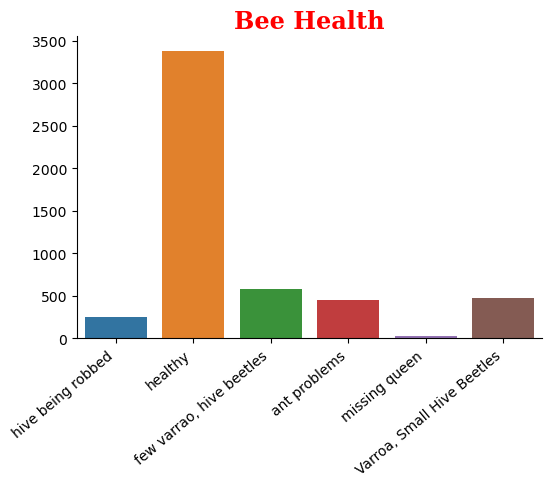

In [4]:
import seaborn as sns
df = pd.read_csv('/home/m.tabassum/Transfer_learning_17_10_2022/bee_data.csv')
plt.figure(dpi=100)
ax = sns.countplot(x=df['health'])
ax.set_xticklabels(df['health'].unique(), rotation=40, ha="right")
ax.set_title("Bee Health",fontdict={'fontsize':'xx-large','fontweight':'bold','fontfamily':'serif','color':'red'})
ax.set_xlabel("")
ax.set_ylabel("")
sns.despine()


# displaying the first five rows of data frame

In [5]:
df.head()

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


#  downsampling the healthy bee images

In [6]:
from sklearn.utils import shuffle
# take a random sample of class 'healthy'
HEALTHY_SAMPLE_SIZE = 579
df_data = pd.read_csv('/home/m.tabassum/Transfer_learning_17_10_2022/bee_data.csv')
df = df_data[df_data['health'] == 'healthy'].sample(HEALTHY_SAMPLE_SIZE, random_state=101)

# remove class 'healthy' from the dataframe
df_data = df_data[df_data['health'] != 'healthy']

# concat df and df_data
df_data = pd.concat([df_data, df], axis=0).reset_index(drop=True)

# shuffle the new dataframe
df_data = shuffle(df_data)

# visualizing data distribution after downsampling

Text(0.5, 1.0, 'Downsampled dataset')

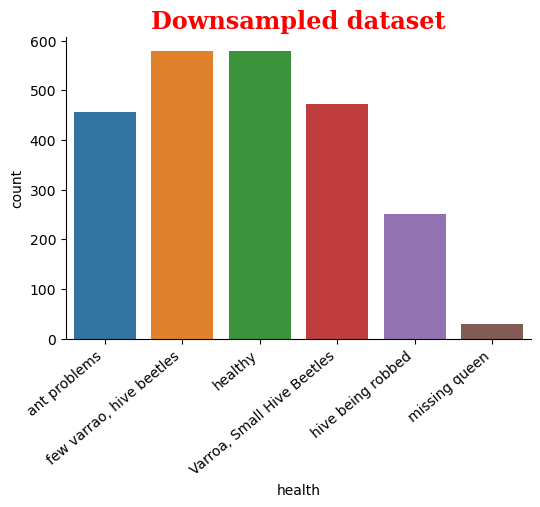

In [7]:
plt.figure(dpi = 100)
ax = sns.countplot(x = df_data['health'])
ax.set_xticklabels(df_data['health'].unique(), rotation = 40, ha = 'right')
sns.despine()
ax.set_title('Downsampled dataset', fontdict={'fontsize':'xx-large','fontweight':'bold','fontfamily':'serif','color':'red'})

# distribution of whole data into train set and test set

In [8]:
from sklearn.model_selection import train_test_split
labels = df_data['health']
# stratify assures the same imbalance ratio in train and test sets
df_train, df_val = train_test_split(df_data, test_size=0.1, random_state=101, stratify=labels) 

# Set the 'file' column as the index in df_data
df_data.set_index('file', inplace=True)

print(df_train.shape)
print(df_val.shape)

(2130, 9)
(237, 9)


# create folder structure

In [ ]:
# Create a new directory
isdir = os.path.isdir("base_dirr")
if isdir:
    print("directory already exits")
else:
    base_dir = 'base_dir'
    os.mkdir(base_dir)


    #[CREATE FOLDERS INSIDE THE BASE DIRECTORY]

    # train_dir
        # 1_healthy
        # 2_fvar
        # 3_var
        # 4_ant
        # 5_robbed
        # 6_queen

    # val_dir
        # 1_healthy
        # 2_fvar
        # 3_var
        # 4_ant
        # 5_robbed
        # 6_queen

    # create a path to 'base_dir' to which we will join the names of the new folders

    # train_dir
    train_dir = os.path.join(base_dir, 'train_dir')
    os.mkdir(train_dir)

    # val_dir
    val_dir = os.path.join(base_dir, 'val_dir')
    os.mkdir(val_dir)


    # [CREATE FOLDERS INSIDE THE TRAIN AND VALIDATION FOLDERS]
    # Inside each folder we create seperate folders for each class

    # create new folders inside train_dir
    healthy = os.path.join(train_dir, '1_healthy')
    os.mkdir(healthy)
    fvar = os.path.join(train_dir, '2_fvar')
    os.mkdir(fvar)
    var = os.path.join(train_dir, '3_var')
    os.mkdir(var)
    ant = os.path.join(train_dir, '4_ant')
    os.mkdir(ant)
    robbed = os.path.join(train_dir, '5_robbed')
    os.mkdir(robbed)
    queen = os.path.join(train_dir, '6_queen')
    os.mkdir(queen)


    # create new folders inside val_dir
    healthy = os.path.join(val_dir, '1_healthy')
    os.mkdir(healthy)
    fvar = os.path.join(val_dir, '2_fvar')
    os.mkdir(fvar)
    var = os.path.join(val_dir, '3_var')
    os.mkdir(var)
    ant = os.path.join(val_dir, '4_ant')
    os.mkdir(ant)
    robbed = os.path.join(val_dir, '5_robbed')
    os.mkdir(robbed)
    queen = os.path.join(val_dir, '6_queen')
    os.mkdir(queen)

# labeling of dataset and transfering of images into folders

In [ ]:
# Get a list of train and val images
train_dir = "/home/m.tabassum/Transfer_learning_17_10_2022/base_dir/train_dir"
val_dir = "/home/m.tabassum/Transfer_learning_17_10_2022/base_dir/val_dir"

train_list = list(df_train['file'])
val_list = list(df_val['file'])

# Key:
# healthy = healthy
# fvar = few varrao, hive beetles
# var = Varroa, Small Hive Beetles
# ant = ant problems
# robbed = hive being robbed
# queen = missing queen



# Transfer the train images.
# Note that we re-name the files during the transfer using a number sequence. This is just a
# safety measure help the generators create a repeatable sequence of images. 
# Otherwise I think they could mix them up and give us confusing results.

length = len(train_list)

for i in range(0,length):
    
    fname = train_list[i]
    image = fname
    description = df_data.loc[image,'health']
    
    # map the class descriptions to folder names
    if description == 'healthy':
        label = '1_healthy'
    if description == 'few varrao, hive beetles':
        label = '2_fvar'
    if description == 'Varroa, Small Hive Beetles':
        label = '3_var'
    if description == 'ant problems':
        label = '4_ant'
    if description == 'hive being robbed':
        label = '5_robbed'
    if description == 'missing queen':
        label = '6_queen'
        
        
    # source path to image
    src = os.path.join('/home/m.tabassum/Transfer_learning_17_10_2022/archive/bee_imgs/bee_imgs', fname)
    # chage the file name
    new_name = str(i) + '_' + 'train'+ '.png'
    # destination path to image
    dst = os.path.join(train_dir, label, new_name)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the val images

length = len(val_list)

for i in range(0,length):
    
    fname = val_list[i]
    image = fname
    description = df_data.loc[image,'health']
    
     # map the class descriptions to folder names
    if description == 'healthy':
        label = '1_healthy'
    if description == 'few varrao, hive beetles':
        label = '2_fvar'
    if description == 'Varroa, Small Hive Beetles':
        label = '3_var'
    if description == 'ant problems':
        label = '4_ant'
    if description == 'hive being robbed':
        label = '5_robbed'
    if description == 'missing queen':
        label = '6_queen'
    
    # source path to image
    src = os.path.join('/home/m.tabassum/Transfer_learning_17_10_2022/archive/bee_imgs/bee_imgs', fname)
    # chage the file name
    new_name = str(i) + '_' + 'val' + '.png'
    # destination path to image
    dst = os.path.join(val_dir, label, new_name)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Check number of train images before augmentation of each class

In [ ]:
# check how many train images we have in each folder

print(len(os.listdir('base_dir/train_dir/1_healthy')))
print(len(os.listdir('base_dir/train_dir/2_fvar')))
print(len(os.listdir('base_dir/train_dir/3_var')))
print(len(os.listdir('base_dir/train_dir/4_ant')))
print(len(os.listdir('base_dir/train_dir/5_robbed')))
print(len(os.listdir('base_dir/train_dir/6_queen')))

# Check number of validation images before augmentation of each class

In [ ]:
# check how many val images we have in each folder

print(len(os.listdir('base_dir/val_dir/1_healthy')))
print(len(os.listdir('base_dir/val_dir/2_fvar')))
print(len(os.listdir('base_dir/val_dir/3_var')))
print(len(os.listdir('base_dir/val_dir/4_ant')))
print(len(os.listdir('base_dir/val_dir/5_robbed')))
print(len(os.listdir('base_dir/val_dir/6_queen')))

# Augmenting images of each class except healthy class

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# note that we are not augmenting class 'healthy'
NUM_IMAGES_WANTED = 1000 # incl. class 'healthy'

# MobileNet needs input images with shape 224x224x3
IMAGE_SIZE = 224
IMAGE_CHANNELS = 3
class_list = ['1_healthy', '2_fvar','3_var','4_ant','5_robbed','6_queen']

for item in class_list:
    
    # We are creating temporary directories here because we delete these directories later.
    
    # create a base dir
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)
    # create a dir within the base dir to store images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # list all images in that directory
    img_list = os.listdir('base_dir/train_dir/' + img_class)

    # Copy images from the class train dir to the img_dir e.g. class 'healthy'
    for fname in img_list:
            # source path to image
            src = os.path.join('base_dir/train_dir/' + img_class, fname)
            # destination path to image
            dst = os.path.join(img_dir, fname)
            # copy the image from the source to the destination
            shutil.copyfile(src, dst)


    # point to a dir containing the images and NOT to the images themselves
    path = aug_dir
    save_path = 'base_dir/train_dir/' + img_class
    
    # Create a data generator to generate augmented images for each class.
    datagen = ImageDataGenerator(
        rotation_range=90,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.01,
        horizontal_flip=True,
        #vertical_flip=True,
        brightness_range=(0.9,1.1),
        fill_mode='nearest')

    batch_size = 9

    aug_datagen = datagen.flow_from_directory(path,
                                        save_to_dir=save_path, # this is where the images are saved
                                        save_format='jpg',
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=batch_size)



    # Generate the augmented images and add them to the training folders
    
    # NUM_IMAGES_WANTED = total number of images we want to have in each class
    # We will use image augmentation to create the additional images.
    
    num_files = len(os.listdir(img_dir))
    
    # Just a calculation to get approx. the same amount of images for each class.
    num_batches = int(np.ceil((NUM_IMAGES_WANTED-num_files)/batch_size))

    # Run the generator and create augmented images.
    # Note that these images are automatically stored in a folder. The path
    # to the save folder is specified as a parameter in the generator above.
    for i in range(0,num_batches):

        imgs, labels = next(aug_datagen)
        
    # delete temporary directory with the raw image files
    shutil.rmtree('aug_dir')

# Check number of train images after augmentation of each class

In [ ]:
# Check how many train images we now have in each folder.
# This is the original images plus the augmented images.

print(len(os.listdir('base_dir/train_dir/1_healthy')))
print(len(os.listdir('base_dir/train_dir/2_fvar')))
print(len(os.listdir('base_dir/train_dir/3_var')))
print(len(os.listdir('base_dir/train_dir/4_ant')))
print(len(os.listdir('base_dir/train_dir/5_robbed')))
print(len(os.listdir('base_dir/train_dir/6_queen')))

# Check number of train images after augmentation of each class

In [ ]:
# Check how many val images we have in each folder.

print(len(os.listdir('base_dir/val_dir/1_healthy')))
print(len(os.listdir('base_dir/val_dir/2_fvar')))
print(len(os.listdir('base_dir/val_dir/3_var')))
print(len(os.listdir('base_dir/val_dir/4_ant')))
print(len(os.listdir('base_dir/val_dir/5_robbed')))
print(len(os.listdir('base_dir/val_dir/6_queen')))

# defining train/val path and variablesfor the model

In [9]:
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10
image_size = 224

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

# fetching the data from the directories using data generators

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
datagen = ImageDataGenerator(preprocessing_function=
                             tensorflow.keras.applications.mobilenet.preprocess_input, validation_split=0.15)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(image_size,image_size),
                                        batch_size=train_batch_size,
                                        subset = "training",
                                        class_mode='categorical')

val_gen = datagen.flow_from_directory(train_path,
                                        target_size=(image_size,image_size),
                                        batch_size=val_batch_size,
                                        subset = "validation",
                                        class_mode='categorical')

# Note: shuffle=False causes the test dataset to not be shuffled.
# Here we will be using the val set as the test dataset because we need to run predict
# in order to generate the confusion matrix.
test_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(image_size,image_size),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 5065 images belonging to 6 classes.
Found 892 images belonging to 6 classes.
Found 237 images belonging to 6 classes.


# modify the mobilenet model

In [20]:
# develop model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation
from keras.layers import GlobalAveragePooling2D
from keras.applications import MobileNet

base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(224,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(128,activation='relu')(x) #dense layer 2
x=Dense(64,activation='relu')(x) #dense layer 3

preds=Dense(6,activation='softmax')(x) #final layer with softmax activation
model = Model(inputs=base_model.input,outputs=preds)
# visualkeras.layered_view(model)

2022-10-31 15:04:58.582299: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-31 15:04:58.604236: I tensorflow/compiler/xla/service/service.cc:170] XLA service 0x5617d1f85930 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-10-31 15:04:58.604275: I tensorflow/compiler/xla/service/service.cc:178]   StreamExecutor device (0): Host, Default Version
2022-10-31 15:04:59.133062: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30985 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0
2022-10-31 15:04:59.139313: I tensorflow/compiler/xla/se

# compile and train the model

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import categorical_crossentropy

Adam = tensorflow.keras.optimizers.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'
)
# sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=Adam,loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

# step_size_train=train_gen.n//train_gen.batch_size
history = model.fit_generator(generator=train_gen,
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    verbose=1,
#                    steps_per_epoch=step_size_train,
                   steps_per_epoch  = 100,
                   epochs=20)

Epoch 1/20


/tmp/ipykernel_1291499/2476433185.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_gen,
2022-10-31 15:05:02.413498: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8302


100/100 [==============================] - 9s 54ms/step - loss: 1.1129 - accuracy: 0.5910 - val_loss: 1.2079 - val_accuracy: 0.4792
Epoch 2/20
100/100 [==============================] - 5s 48ms/step - loss: 0.5264 - accuracy: 0.8140 - val_loss: 0.4821 - val_accuracy: 0.8125
Epoch 3/20
100/100 [==============================] - 5s 49ms/step - loss: 0.3565 - accuracy: 0.8784 - val_loss: 0.3848 - val_accuracy: 0.8542
Epoch 4/20
100/100 [==============================] - 5s 48ms/step - loss: 0.2960 - accuracy: 0.8940 - val_loss: 0.1821 - val_accuracy: 0.9333
Epoch 5/20
100/100 [==============================] - 5s 48ms/step - loss: 0.2221 - accuracy: 0.9240 - val_loss: 0.1440 - val_accuracy: 0.9417
Epoch 6/20
100/100 [==============================] - 5s 47ms/step - loss: 0.1958 - accuracy: 0.9310 - val_loss: 0.1533 - val_accuracy: 0.9333
Epoch 7/20
100/100 [==============================] - 5s 47ms/step - loss: 0.1948 - accuracy: 0.9250 - val_loss: 0.1318 - val_accuracy: 0.9583
Epoch 8/20

# saving the trained model and history

In [28]:
# import random
# r = random.randint(0,30)
# print(r)
model.save('version_'+ str(r))
np.save('history_version_'+str(r)+'.npy', history.history)

INFO:tensorflow:Assets written to: version_10/assets


INFO:tensorflow:Assets written to: version_10/assets


# Load the trained model and history

In [ ]:
# model = keras.models.load_model('version_16')
# history = np.load('version_16/history_version_16.npy', allow_pickle = True).item()
# acc = history['accuracy']
# val_acc = history['val_accuracy']
# loss = history['loss']
# val_loss = history['val_loss']

# Visualize the training loss & accuracy, validation loss & accuracy

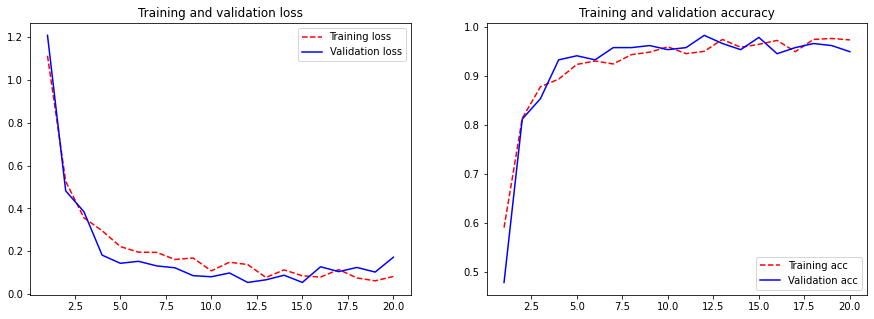

In [34]:
# display the loss and accuracy curves

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.figure(figsize=(15,5))
axes = plt.subplot(1,2,1)
axes.plot(epochs, loss, 'r--', label='Training loss')
axes.plot(epochs, val_loss, 'b', label='Validation loss')
axes.set_title('Training and validation loss')
axes.legend()


axes = plt.subplot(1,2,2)
axes.plot(epochs, acc, 'r--', label='Training acc')
axes.plot(epochs, val_acc, 'b', label='Validation acc')
axes.set_title('Training and validation accuracy')
axes.legend()

# make a prediction

In [24]:
predictions = model.predict_generator(test_gen, steps=len(df_val), verbose=1)

# Get the index of the class with the highest probability score
y_pred = np.argmax(predictions, axis=1)

# Get the labels of the test images.
y_true = test_gen.classes

/tmp/ipykernel_1291499/331712326.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_gen, steps=len(df_val), verbose=1)


237/237 [==============================] - 2s 7ms/step


# create confusion matrix

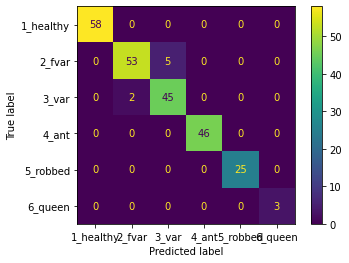

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
actual = y_true
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['1_healthy', '2_fvar', '3_var', '4_ant', '5_robbed','6_queen'])

cm_display.plot()
plt.show()

#  Evaluating the model on different evualuation metrics

In [26]:
from sklearn.metrics import classification_report

# Generate a classification report

names = ['healthy', 'few varrao, hive beetles', 'Varroa, Small Hive Beetles', 
               'ant problems', 'hive being robbed','missing queen']

report = classification_report(y_true, y_pred, target_names=names)

print(report)

                            precision    recall  f1-score   support

                   healthy       1.00      1.00      1.00        58
  few varrao, hive beetles       0.96      0.91      0.94        58
Varroa, Small Hive Beetles       0.90      0.96      0.93        47
              ant problems       1.00      1.00      1.00        46
         hive being robbed       1.00      1.00      1.00        25
             missing queen       1.00      1.00      1.00         3

                  accuracy                           0.97       237
                 macro avg       0.98      0.98      0.98       237
              weighted avg       0.97      0.97      0.97       237

